<img src="https://raw.githubusercontent.com/sebastianVP/sebastianVP/main/toulouselautrec_logo.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> DATA SCIENCE MACHINE LEARNING</font></h1>
<h1><font color="#7F000E" size=4> ANALISIS DE DATOS CON PYTHON
 </font></h1>
<br>
<br>
<div style="text-align:left">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Curso 2271, Clases Lunes y Miercoles 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> Quinta Sesión - 4</font><br>
</div>

#**Regresión lineal multiple**
La regresión lineal múltiple es la gran técnica estadística para comprobar hipótesis y relaciones explicativas.

![DiferenciaRegresionLineal](https://miro.medium.com/max/638/1*-DWX3ZJaj0bvM1aPxcrtyA.jpeg)

##**Descripción de la base de datos**

Datos obtenidos de páginas de internet inmoviliarias de viviendas ubicadas en Melbourne Australia, a continuación se presenta la descripción de las caracteristicas.

**Suburb**: Suburb

**Address**: Address

**Rooms**: Number of rooms

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD

**Regionname**: General Region (West, North West, North, North east ...etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2**: Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size

**BuildingArea**: Building Size

**YearBuilt**: Year the house was built

**CouncilArea**: Governing council for the area

**Lattitude**: Self explanitory

**Longtitude**: Self explanitory


LINK DE DESCARGA DEL CONJUNTO DE DATOS:

https://www.kaggle.com/datasets/glovepm/melbourne-housing

## **Explorasión de la base de datos**

In [ ]:
#importar la libreria de pandas para leer los datos
import pandas as pd

In [ ]:
datos = pd.read_csv("Melbourne_housing.csv",header=387)

In [ ]:
datos.head()

,South MelbourneSuburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Week,CPI,LastCPI,Distance2
0,Footscray,202/51 Gordon St,1,u,85000,PI,Burnham,03-09-2016,6.4,32,108.6,108.2,8.1
1,Caulfield,30 Pyne St,4,h,131000,PI,Rodney,25-02-2017,8.9,57,109.4,108.6,12.8
2,Coburg,171 Moreland Rd,4,h,145000,PI,Jellis,04-06-2016,7.8,19,108.2,108.4,6.8
3,Albion,8/6 Ridley St,1,u,145000,PI,Biggin,28-05-2016,13.9,18,108.2,108.4,14.4
4,Albion,10/117 Anderson Rd,1,u,185000,S,hockingstuart,22-08-2016,13.9,30,108.6,108.2,14.1


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8996 entries, 0 to 8995
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   South MelbourneSuburb  8996 non-null   object 
 1   Address                8996 non-null   object 
 2   Rooms                  8996 non-null   int64  
 3   Type                   8996 non-null   object 
 4   Price                  8996 non-null   int64  
 5   Method                 8996 non-null   object 
 6   SellerG                8996 non-null   object 
 7   Date                   8996 non-null   object 
 8   Distance               8996 non-null   float64
 9   Week                   8996 non-null   int64  
 10  CPI                    8996 non-null   float64
 11  LastCPI                8996 non-null   float64
 12  Distance2              8996 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 913.8+ KB


In [ ]:
datos = datos.dropna()

In [ ]:
datos.shape

(8996, 13)

In [ ]:
import statsmodels.api as sm
from scipy import stats


X = datos.iloc[:,[2,8,9,10,11,12]]
y = datos.Price

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
datos.isnull().mean()

South MelbourneSuburb    0.0
Address                  0.0
Rooms                    0.0
Type                     0.0
Price                    0.0
Method                   0.0
SellerG                  0.0
Date                     0.0
Distance                 0.0
Week                     0.0
CPI                      0.0
LastCPI                  0.0
Distance2                0.0
dtype: float64

In [ ]:
new_df = datos.iloc[:,[2,8,9,10,11,12,4]]


In [ ]:
new_df.corr()['Price']

Rooms        0.560370
Distance    -0.071556
Week         0.059796
CPI          0.063364
LastCPI      0.021798
Distance2   -0.009899
Price        1.000000
Name: Price, dtype: float64

In [ ]:
type(datos['Price'])

pandas.core.series.Series

#**Modelo lineal Multiple**

In [ ]:
import statsmodels.api as sm
from scipy import stats


X = datos.iloc[:,[2,8,9,10,11,12]]
y = datos.Price

X2 = sm.add_constant(X)



est = sm.OLS(y, X2)
est2 = est.fit()


print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     927.9
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:00:00   Log-Likelihood:            -1.3113e+05
No. Observations:                8996   AIC:                         2.623e+05
Df Residuals:                    8989   BIC:                         2.623e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.486e+06   4.01e+06     -0.371      0.7

# **TRABAJO**

1. Realizar e implementar un modelo de Regresión Multiple Lineal utilizando el conjunto de datos descrito, evaluando e indicando los criterios utilizados(Numéro de atributos, correlacion con la variable objetivo)

In [ ]:
new_df

,Rooms,Distance,Week,CPI,LastCPI,Distance2,Price
0,1,6.4,32,108.6,108.2,8.1,85000
1,4,8.9,57,109.4,108.6,12.8,131000
2,4,7.8,19,108.2,108.4,6.8,145000
3,1,13.9,18,108.2,108.4,14.4,145000
4,1,13.9,30,108.6,108.2,14.1,185000
...,...,...,...,...,...,...,...
8991,6,6.3,34,108.6,108.2,9.7,5525000
8992,4,3.3,42,108.6,108.2,4.9,5700000
8993,5,5.6,32,108.6,108.2,9.4,6240000
8994,3,4.6,38,108.6,108.2,8.8,6250000


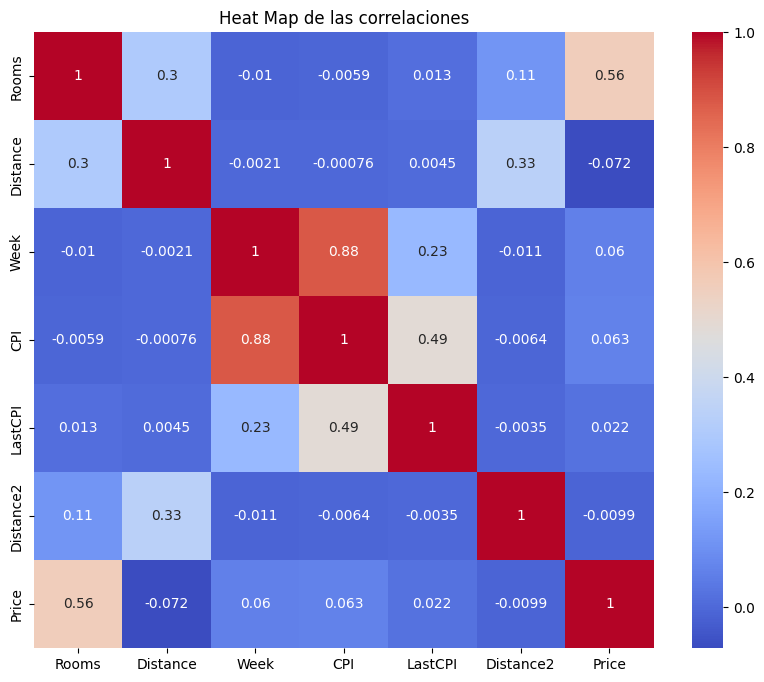

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heat Map de las correlaciones')
plt.show()

In [ ]:
# Drop price from the data frame and copy this to another data frame
new_df_1 = new_df.drop(['Price'], axis=1)

X = new_df_1
y = new_df['Price']


In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the train and test data with a test size of 33%
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)
#Checking the columns in train data set
X_train.columns

Index(['Rooms', 'Distance', 'Week', 'CPI', 'LastCPI', 'Distance2'], dtype='object')

In [ ]:
# Predictions using Linear Regression
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [ ]:
#Validating predictions using Mean squared error
val_train = lm_model.predict(X_train)

In [ ]:
# Finding the R square of the model
R_sq_train = r2_score( y_train,val_train)
print("R Square is ",R_sq_train)

R Square is  0.3807447421000725


In [ ]:
import numpy as np
np.sqrt(mean_squared_error(y_train,val_train))

513376.0389927966

In [ ]:
#Validating predictions using Mean squared error
val_pred = lm_model.predict(X_test)

In [ ]:
# Finding the R square of the model
R_sq = r2_score( y_test,val_pred)
print("R Square is ",R_sq)

R Square is  0.3880612967051048


In [ ]:
import numpy as np
np.sqrt(mean_squared_error(y_test,val_pred))

534557.4873582675

In [ ]:
# 1	6.4	32	108.6	108.2	8.1	8500

## UTILIZANDO EL MODELO PARA PREDECIR UN NUEVO DATO DE PRUEBA

In [ ]:
data = {'Rooms':1, 'Distance':7, 'Week':30, 'CPI':108.2, 'LastCPI':108.4, 'Distance2':10}

In [ ]:
data

{'Rooms': 1,
 'Distance': 7,
 'Week': 30,
 'CPI': 108.2,
 'LastCPI': 108.4,
 'Distance2': 10}

In [ ]:
test_df= pd.DataFrame(data,index=[0])

In [ ]:
test_df


,Rooms,Distance,Week,CPI,LastCPI,Distance2
0,1,7,30,108.2,108.4,10


In [ ]:
new_price= lm_model.predict(test_df)

In [ ]:
print("Precio de Vivienda:", new_price)

Precio de Vivienda: [297955.75563246]
